In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  

In [4]:
n_input_width = 28
n_input_height = 28
n_input_channel = 1

n_conv1_patch_size = 3 
n_conv1_filter = 64
n_conv2_patch_size = 5 
n_conv2_filter = 64
# Learning Parameters
learning_rate    = 0.001
n_epoch = 50
batch_size = 100
n_output  = 10 # e.g. MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input_width * n_input_height])
y = tf.placeholder(tf.float32, [None, n_output])

wc1 = tf.Variable(tf.random_normal([n_conv1_patch_size, n_conv1_patch_size, n_input_channel, n_conv1_filter], stddev=0.1))
bc1 = tf.Variable(tf.random_normal([n_conv1_filter], stddev=0.1))

wc2 = tf.Variable(tf.random_normal([n_conv2_patch_size, n_conv2_patch_size, n_conv1_filter, n_conv2_filter], stddev=0.1))
bc2 = tf.Variable(tf.random_normal([n_conv2_filter], stddev=0.1))

wf1 = tf.Variable(tf.random_normal([int((n_input_width/2)*(n_input_height/2)*n_conv2_filter), n_output], stddev=0.1))
bf1 = tf.Variable(tf.random_normal([n_output], stddev=0.1))

# Reshape input
input_r = tf.reshape(x, shape=[-1, n_input_width, n_input_width, n_input_channel])
# Convolution
conv = tf.nn.conv2d(input_r, wc1, strides=[1, 1, 1, 1], padding='SAME')
# Add-bias
bias_1 = tf.nn.bias_add(conv, bc1) # broadcasting is supported
# Pass ReLu
relu_1 = tf.nn.relu(bias_1)
# Max-pooling
pool  = tf.nn.max_pool(relu_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Convolution
conv_2 = tf.nn.conv2d(pool, wc2, strides=[1, 1, 1, 1], padding='SAME')
# Add-bias
bias_2 = tf.nn.bias_add(conv_2, bc2) # broadcasting is supported
# Pass ReLu
relu_2 = tf.nn.relu(bias_2)
# Max-pooling
#pool_2  = tf.nn.max_pool(relu_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# drop out layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(relu_2, keep_prob)

# Vectorize
dense = tf.reshape(h_fc1_drop, [-1, wf1.get_shape().as_list()[0]])
# Fully-connected layer
out = tf.sigmoid(tf.add(tf.matmul(dense, wf1), bf1))

# Define loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(out, y)) # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
total_loss = np.zeros(n_epoch, dtype=np.float32)

# Initializing the variables
init = tf.initialize_all_variables()

correct_prediction = tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))    
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
sess.run(init)

# MNIST
mnist = input_data.read_data_sets('data/', one_hot=True)

batch_num = int(mnist.train.num_examples / batch_size)

# Training cycle
for i in range(n_epoch):
    # Loop over all batches
    train_acc = 0.
    for j in range(batch_num):
        batch_elem, batch_label = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_elem, y: batch_label, keep_prob: 1.0 })
        total_loss[i] += sess.run(cost, feed_dict={x: batch_elem, y: batch_label, keep_prob: 1.0} )
        train_acc += sess.run(accuracy, feed_dict={x: batch_elem, y: batch_label, keep_prob: 1.0} )

    print ("Iteration No: %03d/%03d cost: %.3f" % (i, n_epoch, total_loss[i]))
    print ("Training accuracy: %.3f" % (train_acc/batch_num))

print ("Optimization Finished!")




Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Iteration No: 000/050 cost: 856.910
Training accuracy: 0.887
Iteration No: 001/050 cost: 817.627
Training accuracy: 0.976
Iteration No: 002/050 cost: 813.297
Training accuracy: 0.984
Iteration No: 003/050 cost: 810.880
Training accuracy: 0.987
Iteration No: 004/050 cost: 809.772
Training accuracy: 0.988
Iteration No: 005/050 cost: 808.870
Training accuracy: 0.991
Iteration No: 006/050 cost: 808.149
Training accuracy: 0.991
Iteration No: 007/050 cost: 807.460
Training accuracy: 0.993
Iteration No: 008/050 cost: 807.132
Training accuracy: 0.993
Iteration No: 009/050 cost: 806.703
Training accuracy: 0.993
Iteration No: 010/050 cost: 806.490
Training accuracy: 0.994
Iteration No: 011/050 cost: 806.315
Training accuracy: 0.994
Iteration No: 012/050 cost: 806.098
Training accuracy: 0.995
Iteration No: 013/050 cost: 805.933
T

Test accuracy of CNN with 2 Conv Layers: 0.991


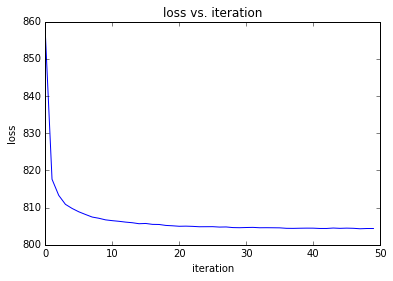

In [11]:
#plot chart
plt.figure(0)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.title("loss vs. iteration")
plt.plot(total_loss)

test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
print ("Test accuracy of CNN with 2 Conv Layers: %.3f" % (test_acc))

Output of the random image, first and the 25th filter outputs of the 1st conv layer respectively


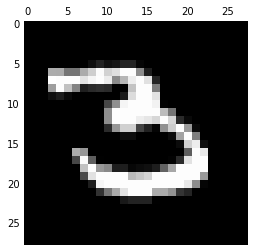

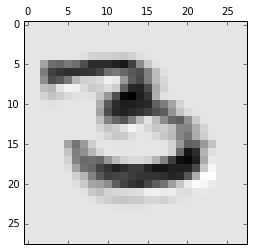

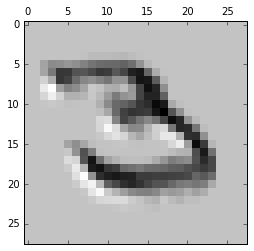

In [16]:
nsample = 1
randidx = np.random.randint(mnist.test.images.shape[0], size=nsample)
curr_img   = np.reshape(mnist.test.images[randidx, :], (28, 28)) # 28 by 28 matrix 
curr_label = np.argmax(mnist.test.labels[randidx, :] ) # Label
print("Output of the random image, first and the 25th filter outputs of the 1st conv layer respectively")
plt.matshow(curr_img, cmap=plt.get_cmap('gray'))

out = sess.run(bias_1, feed_dict={x: mnist.test.images[randidx, :], y: mnist.test.labels[randidx, :], keep_prob: 1.0 })
plt.matshow(out[0,:,:,0], cmap=plt.get_cmap('gray'))
plt.matshow(out[0,:,:,24], cmap=plt.get_cmap('gray'))


In [17]:
sess.close()